In [ ]:
# Import neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load training data
data = np.load('P-1.npy')

# Display first 5 data
data[:5]

array([[-0.52315476,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.68885677,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.55499272,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [ ]:
np.isnan(data).sum()

np.int64(0)

In [ ]:
data.shape

(2872, 25)

In [ ]:
np.unique(data[:, 0])

array([-1.        , -0.9956584 , -0.97901587, ...,  0.99348774,
        0.99927645,  1.        ])

In [ ]:
range_row = np.ptp(data, axis = 1)
range_row

array([0.52315476, 0.68885677, 0.55499272, ..., 0.72575974, 0.68958026,
       0.70984087])

In [ ]:
range_col = np.ptp(data, axis=0)
range_col

array([2., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0.])

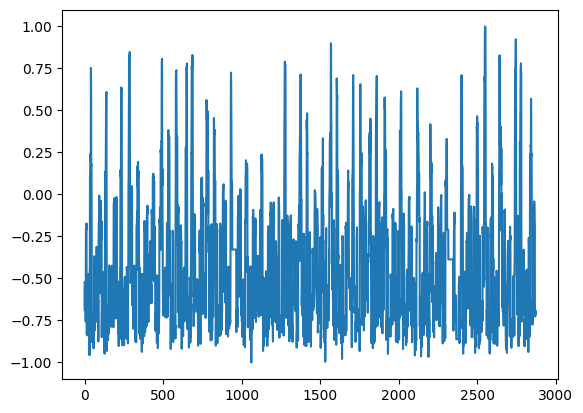

In [ ]:
plt.plot(data[:, 0])
plt.show()

In [ ]:
np.unique(data[:, 1], return_counts = True)

(array([0., 1.]), array([2774,   98]))

/tmp/ipython-input-635102584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[:, 1], y=data[:, 0], order=[0., 1.], palette="bright").set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})


Text(0.5, 1.0, 'Barplot')

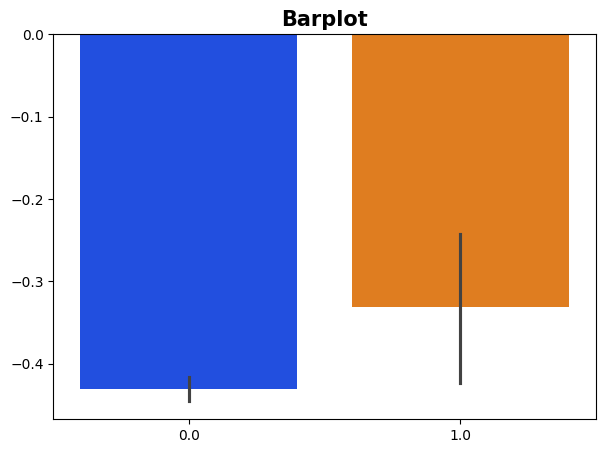

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data[:, 1], y=data[:, 0], order=[0., 1.], palette="bright").set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})

In [ ]:
np.unique(data[:, 2], return_counts=True)

(array([0., 1.]), array([2855,   17]))

/tmp/ipython-input-1701012314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[:, 2], y=data[:, 0], order=[0., 1.], palette="bright", estimator=sum).set_title("Barplot of 3rd Feature",fontsize=15, fontdict={"weight": "bold"} )


Text(0.5, 1.0, 'Barplot of 3rd Feature')

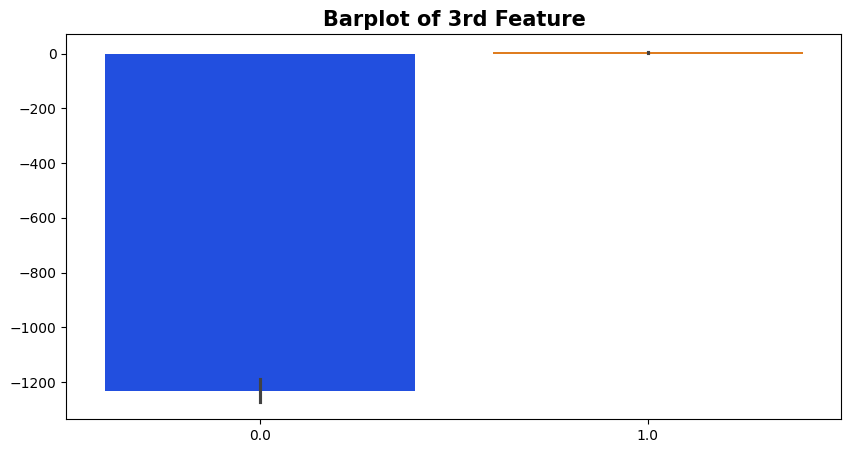

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data[:, 2], y=data[:, 0], order=[0., 1.], palette="bright", estimator=sum).set_title("Barplot of 3rd Feature",fontsize=15, fontdict={"weight": "bold"} )

In [ ]:
np.unique(data[:, 3], return_counts=True)

(array([0., 1.]), array([2792,   80]))

/tmp/ipython-input-4035545201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[:, 3], y=data[:, 0], order=[0., 1.], palette="bright").set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})


Text(0.5, 1.0, 'Barplot')

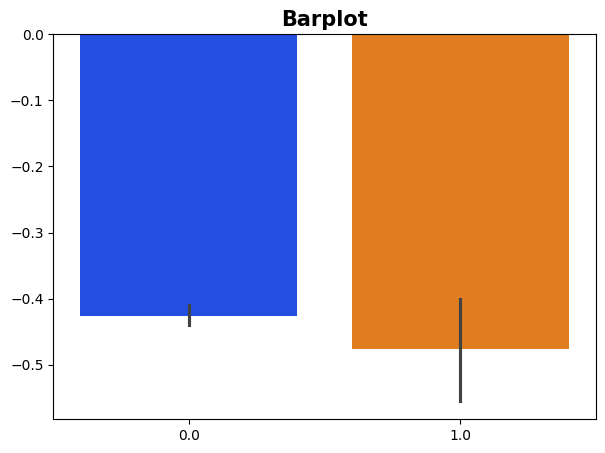

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data[:, 3], y=data[:, 0], order=[0., 1.], palette="bright").set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})

In [ ]:
np.unique(data[:, 4], return_counts=True)

(array([0.]), array([2872]))

/tmp/ipython-input-2330633692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[:, 4], y=data[:, 0], order=[0., 1.], palette="bright").set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})


Text(0.5, 1.0, 'Barplot')

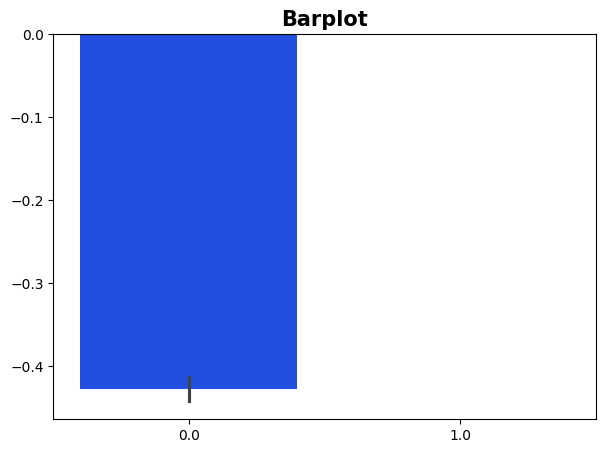

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data[:, 4], y=data[:, 0], order=[0., 1.], palette="bright").set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})

In [ ]:
np.unique(data[:, 5], return_counts=True)

(array([0., 1.]), array([2420,  452]))

/tmp/ipython-input-1371452394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[:, 5], y=data[:, 0], order=[0., 1.], palette="bright", estimator=sum).set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})


Text(0.5, 1.0, 'Barplot')

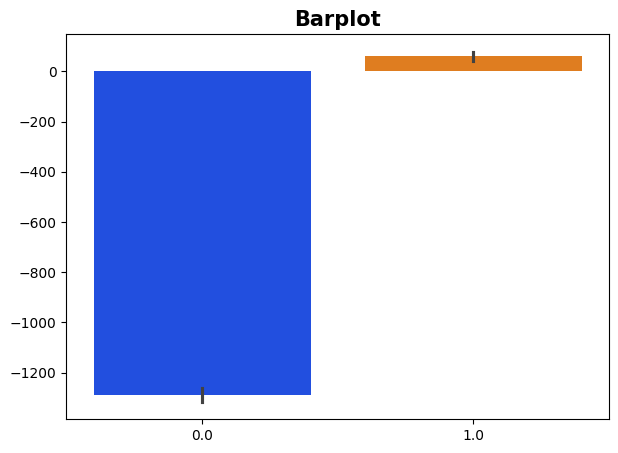

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data[:, 5], y=data[:, 0], order=[0., 1.], palette="bright", estimator=sum).set_title("Barplot", fontsize=15, fontdict={"weight": "bold"})

In [ ]:
np.unique(data[:, 6], return_counts=True)

(array([0., 1.]), array([2519,  353]))

In [ ]:
np.unique(data[:, 7], return_counts=True)

(array([0., 1.]), array([2868,    4]))

In [ ]:
np.unique(data[:, 8], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 9], return_counts=True)

(array([0., 1.]), array([2870,    2]))

In [ ]:
np.unique(data[:, 10], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 11], return_counts=True)

(array([0., 1.]), array([2868,    4]))

In [ ]:
np.unique(data[:, 12], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 13], return_counts=True)

(array([0., 1.]), array([2870,    2]))

In [ ]:
np.unique(data[:, 14], return_counts=True)

(array([0., 1.]), array([2870,    2]))

In [ ]:
np.unique(data[:, 15], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 16], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 17], return_counts=True)

(array([0., 1.]), array([2792,   80]))

In [ ]:
np.unique(data[:, 18], return_counts=True)

(array([0., 1.]), array([2793,   79]))

In [ ]:
np.unique(data[:, 19], return_counts=True)

(array([0., 1.]), array([2832,   40]))

In [ ]:
np.unique(data[:, 20], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 21], return_counts=True)

(array([0., 1.]), array([2760,  112]))

In [ ]:
np.unique(data[:, 22], return_counts=True)

(array([0., 1.]), array([2765,  107]))

In [ ]:
np.unique(data[:, 23], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
np.unique(data[:, 24], return_counts=True)

(array([0.]), array([2872]))

In [ ]:
# Check for stationarity

series = pd.Series(data[0])
result = adfuller(series.values)
print(f'result: {result[0]}')
print(f'p-value: {result[1]}')

result: -2.0597925422169916e+16
p-value: 0.0


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [ ]:
# Load test data
test_data = np.load('P-1_test.npy')

# Display first five test data
test_data[:5]

array([[-0.69516194,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.68570386,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.72571851,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [ ]:
# ls defines the number of periods used to predict the value
# lp defines the number of timesteps to predict
ls = 250
lp = 1
X = []
y = []


for i in range(0, len(data)-ls, 1):
  input = data[i: i+ls]
  output = data[i+ls, 0]
  X.append(input)
  y.append(output)
  #print(f"input: {input}, output: {output}")

In [ ]:
# Convert training data to a numpy array
X_train = np.array(X)
X_train.shape

(2622, 250, 25)

In [ ]:
# Convert predicted values to a numpy array
y_train = np.array(y)
y_train.shape

(2622,)

In [ ]:
# Create sequences for test data
M = []
n = []
for i in range(0, len(test_data)-ls, 1):
  input = test_data[i: i+ls]
  output = test_data[i+ls, 0]
  M.append(input)
  n.append(output)

In [ ]:
# Convert test data to a numpy array
X_test = np.array(M)
X_test.shape

(8255, 250, 25)

In [ ]:
# Convert test data to a numpy array
y_test = np.array(n)
y_test.shape

(8255,)

In [ ]:
# Define the model
model = keras.Sequential([
    LSTM(250, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(80, return_sequences=True),
    Dropout(0.3),
    LSTM(80, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation = 'linear')
]
)
# Display model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 250, 250)       │       276,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250, 250)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 250, 80)        │       105,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 250, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80)             │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433,521 (1.65 MB)

 Trainable params: 433,521 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
# Set earlystopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs = 100, validation_split= 0.2, batch_size = 64, callbacks=[earlystopping])

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - loss: 0.1762 - mae: 0.3507 - val_loss: 0.1188 - val_mae: 0.2789
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - loss: 0.0905 - mae: 0.2471 - val_loss: 0.0897 - val_mae: 0.2557
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - loss: 0.0736 - mae: 0.2225 - val_loss: 0.0692 - val_mae: 0.2149
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0624 - mae: 0.2001 - val_loss: 0.0655 - val_mae: 0.2073
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0604 - mae: 0.1981 - val_loss: 0.0653 - val_mae: 0.2059
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0524 - mae: 0.1853 - val_loss: 0.0647 - val_mae: 0.2057
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0512 - mae: 0.1808 - val_loss: 0.0574 - val_mae: 0.1894
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0480 - mae: 0.1738 - val_loss: 0.0570 - val_mae: 0.1877
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.045

In [ ]:
# Predictiion on test data
y_hat = model.predict(X_test)
y_hat

258/258 ━━━━━━━━━━━━━━━━━━━━ 51s 198ms/step


array([[-0.6909806 ],
       [-0.57889676],
       [-0.34582493],
       ...,
       [-0.25460497],
       [-0.3239863 ],
       [-0.47983894]], dtype=float32)

In [ ]:
# Create a list containing errors
e = []
j = 0
total = 0
for i in y_test:
  e_t = np.abs(i - y_hat[j])
  total+= e_t
  j = j+1
  e.append(e_t)
nmae = (total/ len(y_test)) / (np.max(y_test) - np.min(y_test))
print(f"Normalized Mean Absolute Error: {nmae * 100}")

Normalized Mean Absolute Error: [5.79767808]


In [ ]:
# Smoothing errors
h = 2100
alpha = 0.005
e_s= []
for i in range(0, len(e)):
  ewma = alpha * e[i] + (1-alpha) * e[i-1]
  e_s.append(ewma)

In [ ]:
e_s[0]

array([0.25191904])

In [ ]:
# Calculate mean and standard deviation
mu_es = np.mean(e_s)
sigma_es = np.std(e_s)
print(f"Mean of smoothed error: {mu_es:.2f}")
print(f"Standard deviation of smoothed error: {sigma_es:.2f}")

Mean of smoothed error: 0.12
Standard deviation of smoothed error: 0.11


In [ ]:
# Create a list of values
Z = set([1.0])
z = []
for i in Z:
  if i > mu_es:
    z.append(i)

In [ ]:
len(e_s)

8255

In [249]:
max_epsilon = -123456789


epsilon = mu_es + z[0] * sigma_es
print(f"Epsilon: {epsilon:.2f}")

seq = []
nominal = []
Ea = []
time_stamp=[]
for i in range (0, len(e_s), 1):
  ts = []
  ea = []
  if e_s[i] > epsilon :
    if i < 3:
       k = 3-i
       for j in range(0, k, 1):
        ea.append(mu_es)
        #print(f"Ea: {ea}")
       for k in range(k, k+3, 1):
        ea.append(e_s[k])
        ts.append(k)
    k = 3-i
    for k in range(k, i+3, 1):
      ea.append(e_s[k])
      ts.append(k)
      #print(f"Ea: {ea}")
    seq.append(ea)
    time_stamp.append(ts)
    Ea.append(ea)
  else:
    nominal.append(e_s[i])

del_mu = mu_es - np.mean(nominal)
del_sigma = sigma_es - np.std(nominal)

print(f"len seq: {len(seq)}")
print(f"Del mu: {del_mu:.2f}")
print(f"Del sigma: {del_sigma:.2f}")
try:
  opt_epsilon = ((del_mu / mu_es) + (del_sigma / sigma_es)) / (len(Ea)+ len(seq)**2)
  print(f"Optimal epsilon: {opt_epsilon}")
except ZeroDivisionError:
  print(f"Can't divided by zero")
if opt_epsilon > max_epsilon:
  max_epsilon = opt_epsilon
  Eseq = seq
  Nominal = nominal

print(f"Max epsilon: {max_epsilon}")

Epsilon: 0.23
len seq: 1183
Del mu: 0.04
Del sigma: 0.05
Optimal epsilon: 5.783626681067934e-07
Max epsilon: 5.783626681067934e-07


In [250]:
e_max = [max(i) for i in Eseq]
len(e_max)

1183

In [243]:
np.unique(e_max, return_counts=True)

(array([0.16604171, 0.35404459, 0.51846122, 0.53526924, 0.7630766 ,
        0.76515925]),
 array([  1,   1,   7,   8, 426, 740]))

In [251]:

for i in e_max:
  score = (i - max_epsilon) / (mu_es + sigma_es)
  print(f"Anomaly: {i}, Anomaly score: {score}")

Anomaly: [0.16604171], Anomaly score: [0.72206023]
Anomaly: [0.35404459], Anomaly score: [1.53962515]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.51846122], Anomaly score: [2.25462094]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.53526924], Anomaly score: [2.32771368]
Anomaly: [0.7630766], Anomaly score: [3.31837563]
Anomaly: [0.7630766], Anomaly score: [3.31837563]
Anomaly: [0.7630766], Anomaly sco

In [173]:
e_max.sort(reverse=True)
len(e_max)


1183

In [252]:
# Sort in Descending order
e_max.sort(reverse=True)
e_max.append(np.max(nominal))

In [253]:
len(e_max)

1184

In [239]:
Ea[0]

[np.float64(0.11595356166627897),
 np.float64(0.11595356166627897),
 np.float64(0.11595356166627897),
 array([0.11871143]),
 array([0.16604171]),
 array([0.0054918])]

In [254]:
len(Nominal)

7072

In [260]:
# Mitigating false positives by pruning anomalies
p = 0.13
for i in range(1, len(Eseq)+1, 1):
  prev = e_max[i-1]
  curr = e_max[i]
  #print(f"Prev: {prev}")
  #print(f"Curr:{curr}")
  d = (prev - curr) / prev
  #print(f"d: {d}")
  if d < p:
    Nominal.append(e_s[i])
    for j in Ea:
      if e_s[i] in j:
        j.remove(e_s[i])






In [297]:
actual_1 = y_test[2149:2349]
actual_2 = y_test[4536: 4844]
actual_3 = y_test[3539:3779]

In [302]:
actual = [actual_1, actual_2, actual_3]


In [319]:
Ea[0][0]

np.float64(0.11595356166627897)

In [331]:
# To be improved
tp=0
fp=0
fn=0
tn=0
f_ea=[]
for i in Ea:
  for j in i:
    if any(j for x in actual for j in x) == True:
      tp+=1
      f_ea.append(i)
      break
    elif any(j for x in actual for j in x) == False:
      fn+=1
      break
    elif all(j for x in actual for j in x) == True:
      fp+=1
      break
    else:
      tn+=1
      break



In [332]:
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")

True Positives: 1183
False Negatives: 0
False Positives: 0
True Negatives: 0


In [333]:
len(f_ea)

1183

In [335]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1_score = 2 * (precision * recall)/ (precision+recall)
accuracy = (tp+tn)/ (tp+tn+fp+fn)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-1 Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 1.00
Recall: 1.00
F-1 Score: 1.00
Accuracy: 1.00


In [334]:

label = pd.read_csv('labeled_anomalies.csv')
label.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307
